In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
import requests
from io import BytesIO

# OpenCV 출력
from google.colab.patches import cv2_imshow

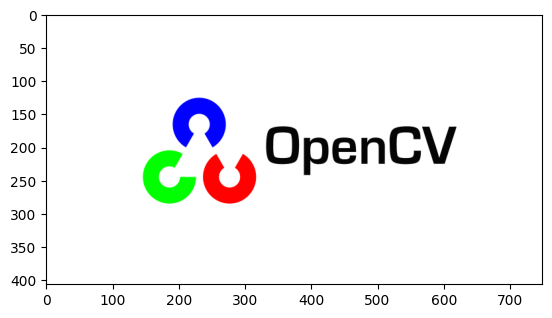

In [ ]:
OpenCV=cv2.imread('/content/opencv.png')
plt.imshow(OpenCV)
plt.show()

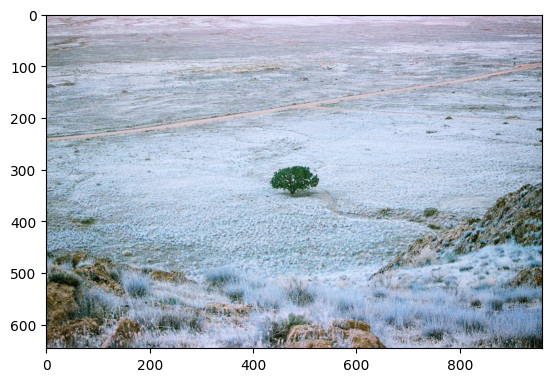

In [ ]:
tree=cv2.imread('/content/tree.jpg')
plt.imshow(tree)
plt.show()

In [ ]:
print(OpenCV.shape)
print(tree.shape)

(407, 749, 3)
(646, 960, 3)


* 삽입할 이미지의 row, col, channel 정보
* 대상 이미지에서 삽입할 이미지의 영역을 추출

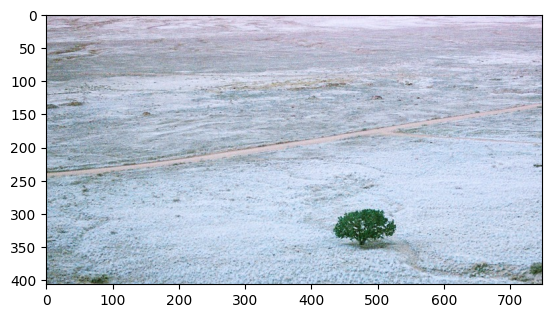

In [ ]:
tree1=tree[0:407, 0:749]
plt.imshow(tree1)
plt.show()

In [ ]:
rows, cols, channels=tree1.shape
OpenCV1=OpenCV[0:rows, 0:cols]
print(OpenCV.shape)

(407, 749, 3)


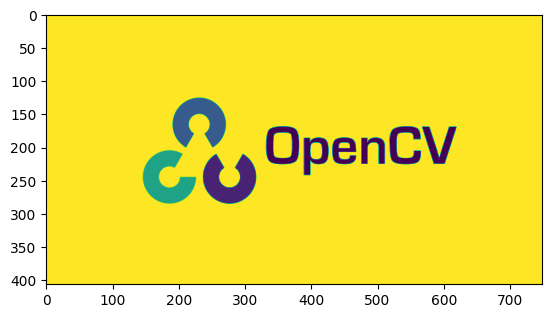

In [ ]:
# mask 생성 : 로고 이미지를 grayscale로 변경
opencv_gray=cv2.cvtColor(OpenCV1,cv2.COLOR_BGR2GRAY)
plt.imshow(opencv_gray)
plt.show()

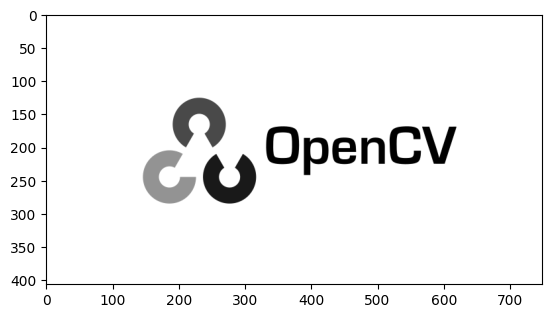

In [ ]:
plt.imshow(opencv_gray, cmap='gray')
plt.show()

In [ ]:
# binary image로 변환
# mask 로고부분(흰색(255)), 바탕(검정(0))
res,mask=cv2.threshold(opencv_gray, 200, 255, cv2.THRESH_BINARY_INV)
mask_inv=cv2.bitwise_not(mask)

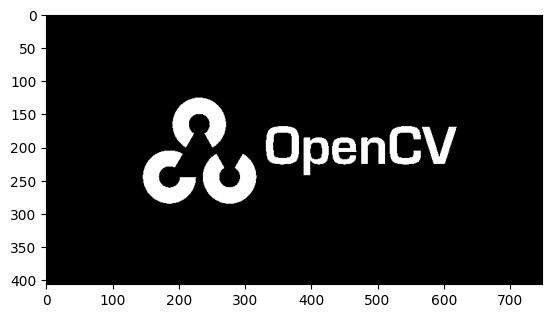

In [ ]:
plt.imshow(mask, cmap='gray')
plt.show()

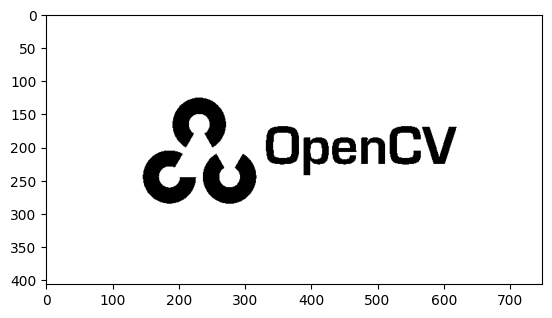

In [ ]:
plt.imshow(mask_inv, cmap='gray')
plt.show()

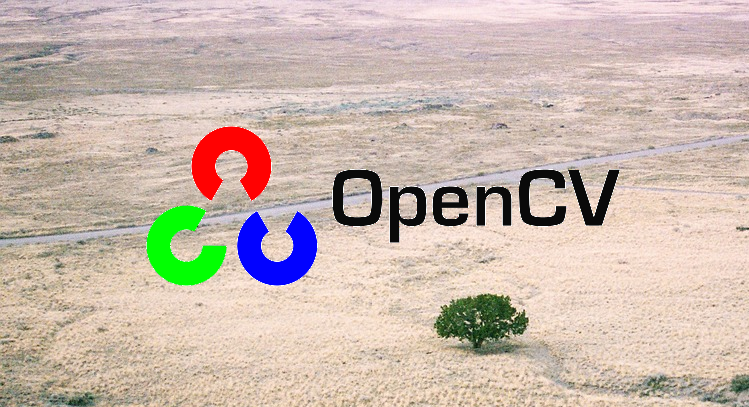

In [ ]:
opencv_res=cv2.bitwise_and(OpenCV1, OpenCV1, mask=mask)
tree_res=cv2.bitwise_and(tree1, OpenCV1, OpenCV1, mask=mask_inv)

result_img=cv2.add(opencv_res, tree_res)
cv2_imshow(result_img)

# 이미지 블렌딩(Image Blending)
* 두 이미지의 사이즈가 같아야 함
* cv2.addWeighted()
* g(x)=af1(x)+(1-a)f2(x)

In [ ]:
dog=cv2.imread('/content/dog.jpg')
cat=cv2.imread('/content/cat.jpg')

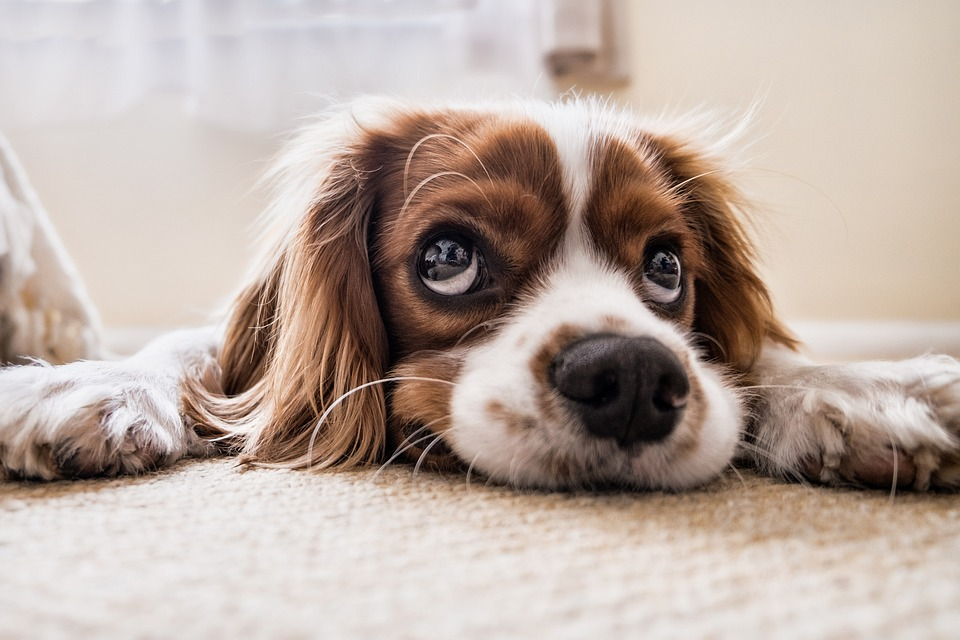

In [ ]:
cv2_imshow(dog) # opencv = BGR

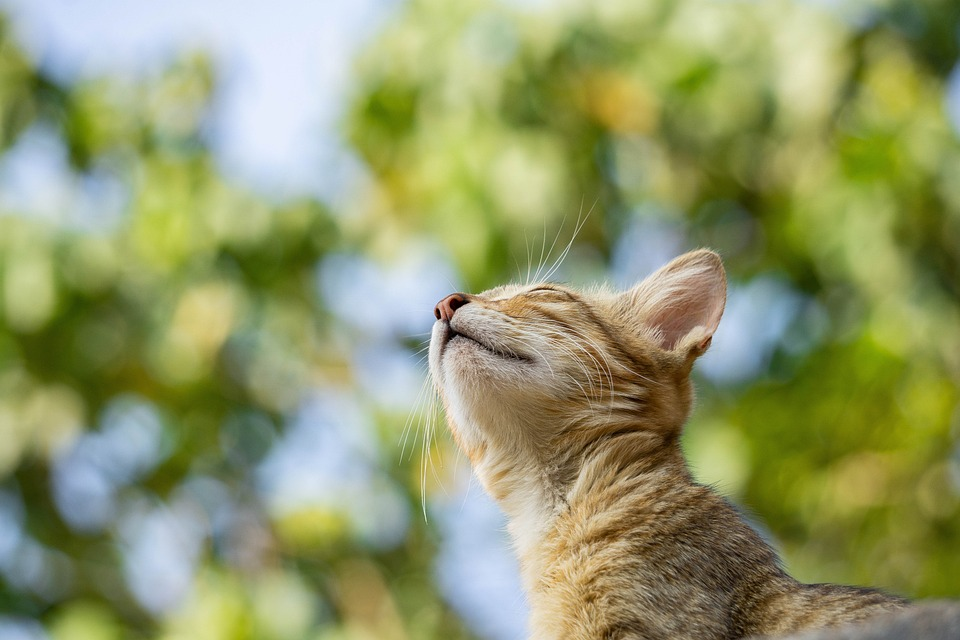

In [ ]:
cv2_imshow(cat)

In [ ]:
print(dog.shape)
print(cat.shape)

(640, 960, 3)
(640, 960, 3)


In [ ]:
dog_rgb=cv2.cvtColor(dog,cv2.COLOR_BGR2RGB) # BGR -> RGB
cat_rgb=cv2.cvtColor(cat,cv2.COLOR_BGR2RGB) # BGR -> RGB

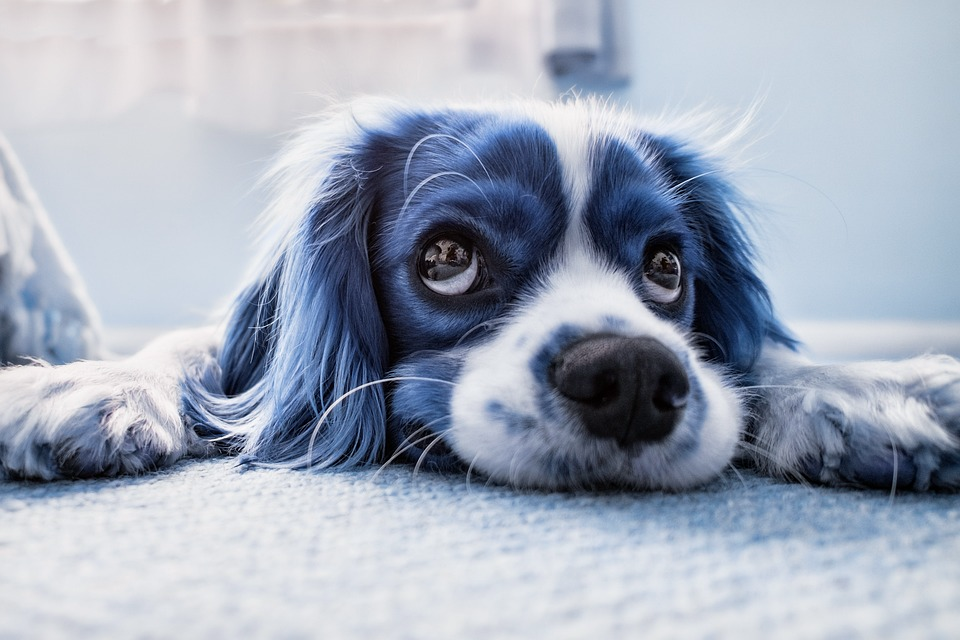

In [ ]:
cv2_imshow(dog_rgb)

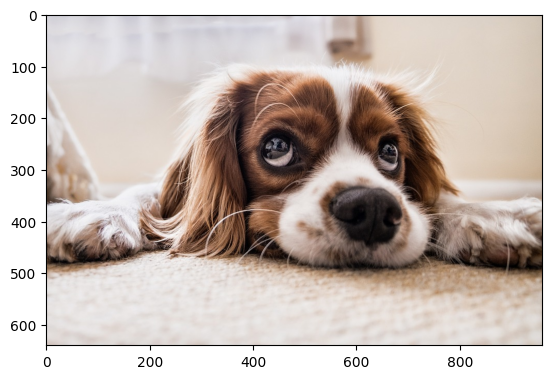

In [ ]:
plt.imshow(dog_rgb)

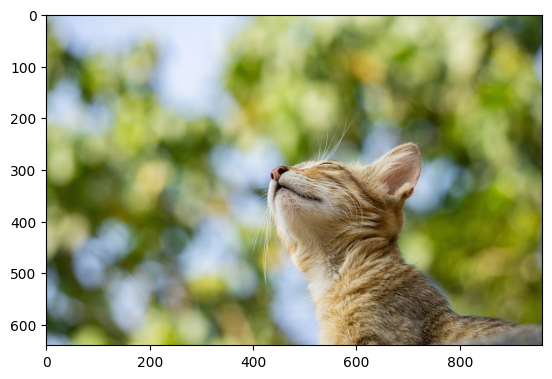

In [ ]:
plt.imshow(cat_rgb)
plt.show()

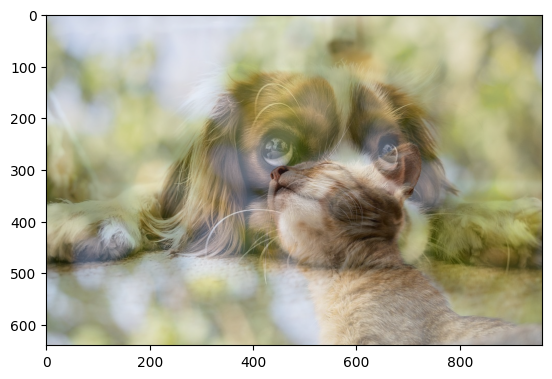

In [ ]:
cat_dog_5=cv2.addWeighted(src1=cat_rgb, alpha=0.5, src2=dog_rgb, beta=0.5, gamma=0)
plt.imshow(cat_dog_5)
plt.show()

In [ ]:
cat_dog_1=cv2.addWeighted(cat_rgb, 0.1, dog_rgb, 0.9, 0)
cat_dog_3=cv2.addWeighted(cat_rgb, 0.3, dog_rgb, 0.7, 0)
cat_dog_9=cv2.addWeighted(cat_rgb, 0.9, dog_rgb, 0.1, 0)

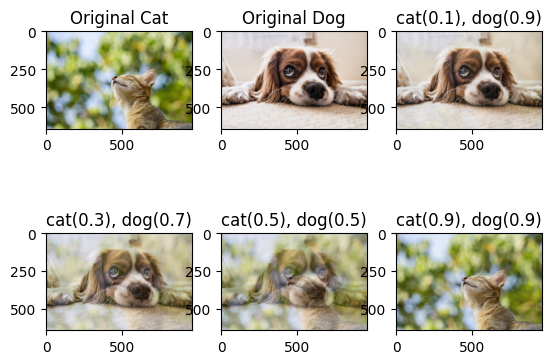

In [ ]:
plt.subplot(231)
plt.imshow(cat_rgb)
plt.title('Original Cat')

plt.subplot(232)
plt.imshow(dog_rgb)
plt.title('Original Dog')

plt.subplot(233)
plt.imshow(cat_dog_1)
plt.title('cat(0.1), dog(0.9)')

plt.subplot(234)
plt.imshow(cat_dog_3)
plt.title('cat(0.3), dog(0.7)')

plt.subplot(235)
plt.imshow(cat_dog_5)
plt.title('cat(0.5), dog(0.5)')

plt.subplot(236)
plt.imshow(cat_dog_9)
plt.title('cat(0.9), dog(0.9)')
plt.show()

# 기본 임계처리
* cv2.threshold()
* 이진화 : 흑, 백을 분류하여 처리
* 임계값 : 흑, 백을 분류하는 기준값
* 파라미터
 - src : 입력이미지(single channel 이미지, grayscale 이미지)
 - thresh : 임계값
 - maxval : 임계값을 넘었을 때 적용할 값
 - type : thresholding type

# thresholding type
* cv2.THRESH_BINARY
 - src(x,y)>thresh일 때, maxval
 - 나머지 0
* cv2.THRESH_BINARY_INV
 - src(x,y)>thresh일 때, 0
 - 나머지 max_val
* cv2.THRESH_TRUNC
 - src(x,y)>thresh일 때, thresh
 - 나머지 src(x,y)
* cv2.THRESH_TOZERO
 - src(x,y)>thresh일 때, src(x,y)
 - 나머지 0
* cv2.THRESH_TOZERO_INV
 - src(x,y)>thresh일 때, 0
 - 나머지 src(x,y)

In [ ]:
abcd=cv2.imread('/content/abcd.jpg',0) # 0을 붙여서 3 -> single channel
print(abcd.shape)

(640, 960)


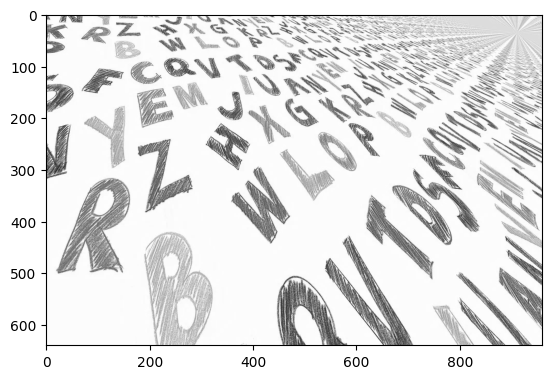

In [ ]:
plt.imshow(abcd,cmap='gray')
plt.show()

In [ ]:
ret, thresh1=cv2.threshold(abcd,128,255,cv2.THRESH_BINARY)
ret, thresh2=cv2.threshold(abcd,128,255,cv2.THRESH_BINARY_INV)
ret, thresh3=cv2.threshold(abcd,128,255,cv2.THRESH_TRUNC)
ret, thresh4=cv2.threshold(abcd,128,255,cv2.THRESH_TOZERO)
ret, thresh5=cv2.threshold(abcd,128,255,cv2.THRESH_TOZERO_INV)

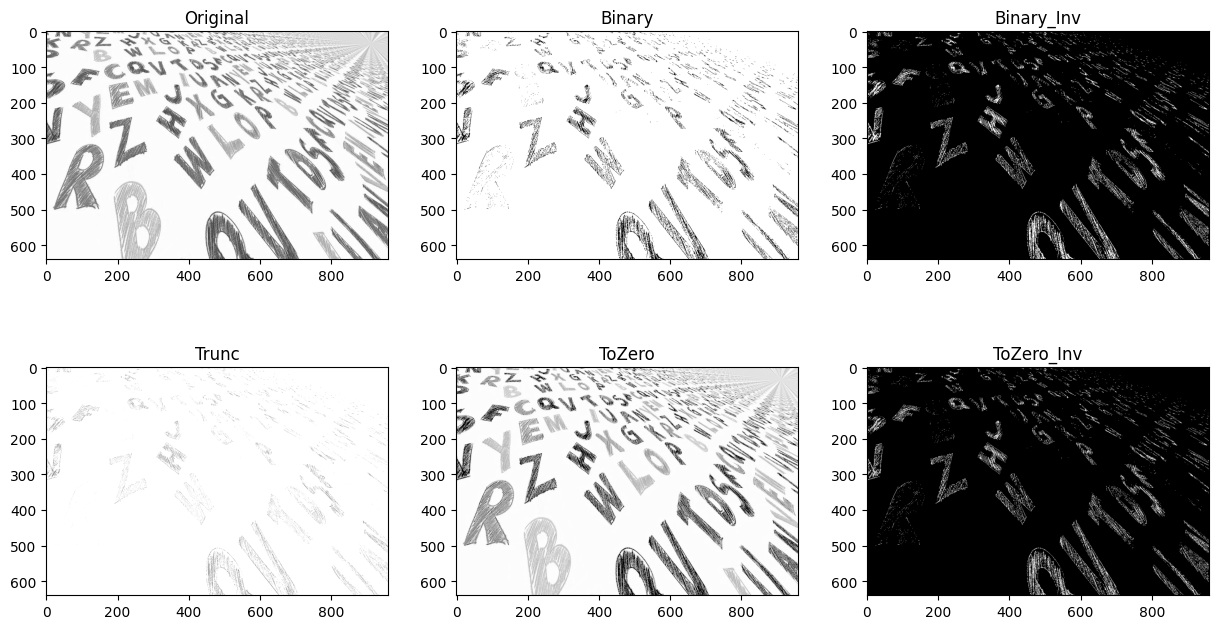

In [ ]:
images=[abcd,thresh1,thresh2,thresh3,thresh4,thresh5]
titles=['Original','Binary','Binary_Inv','Trunc','ToZero','ToZero_Inv']

plt.figure(figsize=(15,8))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
plt.show()

# 적응 임계처리
* cv2.adaptiveThreshold()
 - 이미지 전체에 임계값 적용 시 이미지 내의 음영 차이에 따라 일부 영역이 모두 흰색 또는 검정색으로 보이는 현상
 - 이런 현상을 해결하기 위해 작은 영역별로 thrersholding
* 파라미터
 - src : grayscale 이미지
 - maxvalue : 임계값을 넘었을 때 적용할 값
 - adaptiveMethod : thresholding value 결정하는 계산 방법
 - blockSize : thresholding을 적용할 영역 사이즈
 - c : 평균, 가중평균에서 차감할 값
* AdaptiveMethod
 - cv2.ADAPTIVE_THRESH_MEAN_C : 주변 영역 평균값
 - cv2.ADAPTIVE_THRESH_GAUSSIAN_C : 주변 영역 가우시안값

In [ ]:
adt_m=cv2.adaptiveThreshold(abcd, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 2)
adt_g=cv2.adaptiveThreshold(abcd, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 2)

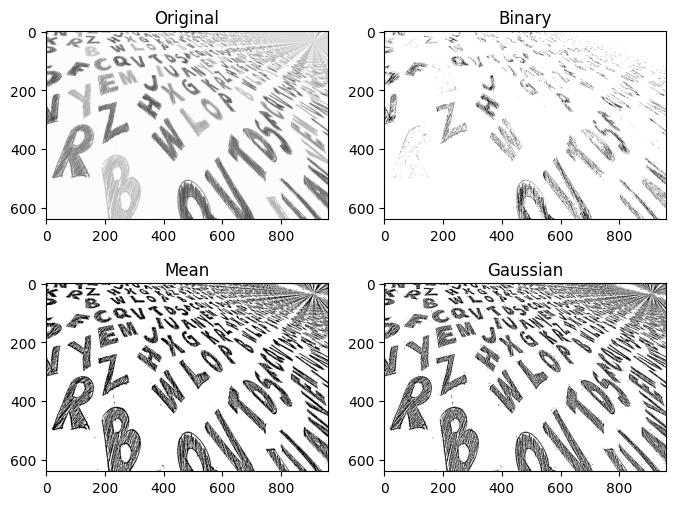

In [ ]:
images=[abcd,thresh1,adt_m,adt_g]
titles=['Original','Binary','Mean','Gaussian']

plt.figure(figsize=(8,6))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
plt.show()

In [ ]:
snow=cv2.imread('/content/snow.jpg',0) # 0을 붙여서 3 -> single channel
print(snow.shape)

(639, 960)


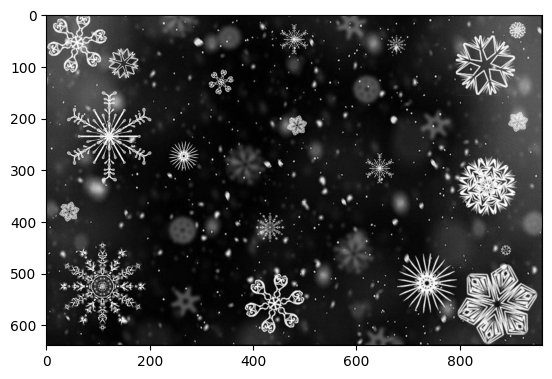

In [ ]:
plt.imshow(snow,cmap='gray')
plt.show()

In [ ]:
ret, thresh11=cv2.threshold(snow,128,255,cv2.THRESH_BINARY)
ret, thresh21=cv2.threshold(snow,128,255,cv2.THRESH_BINARY_INV)
ret, thresh31=cv2.threshold(snow,128,255,cv2.THRESH_TRUNC)
ret, thresh41=cv2.threshold(snow,128,255,cv2.THRESH_TOZERO)
ret, thresh51=cv2.threshold(snow,128,255,cv2.THRESH_TOZERO_INV)
adt_m1=cv2.adaptiveThreshold(snow, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 2)
adt_g1=cv2.adaptiveThreshold(snow, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 2)

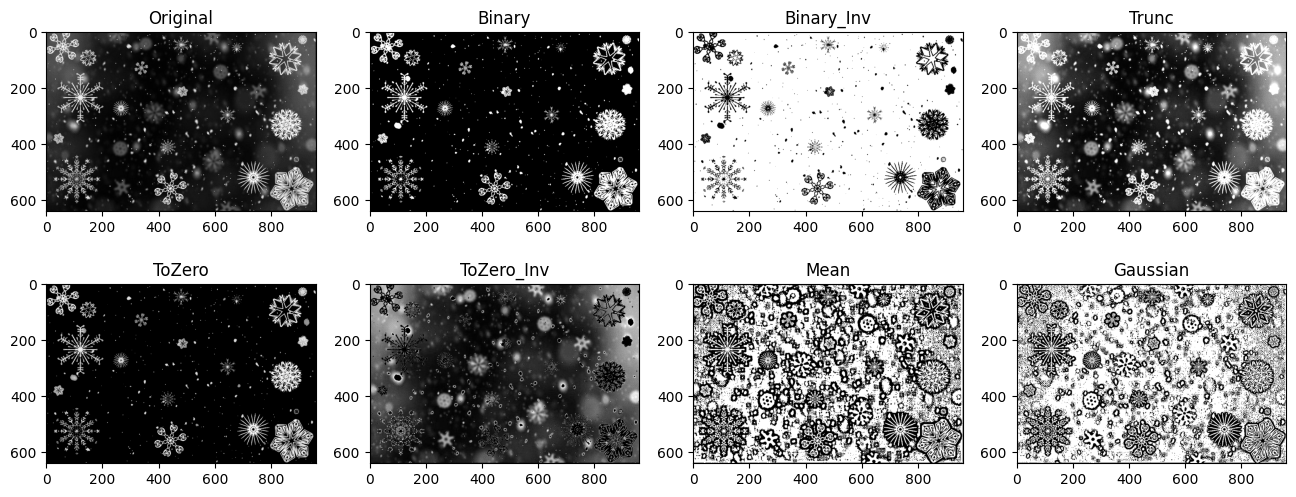

In [ ]:
images=[snow,thresh11,thresh21,thresh31,thresh41,thresh51,adt_m1,adt_g1]
titles=['Original','Binary','Binary_Inv','Trunc','ToZero','ToZero_Inv','Mean','Gaussian']

plt.figure(figsize=(16,6))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
plt.show()

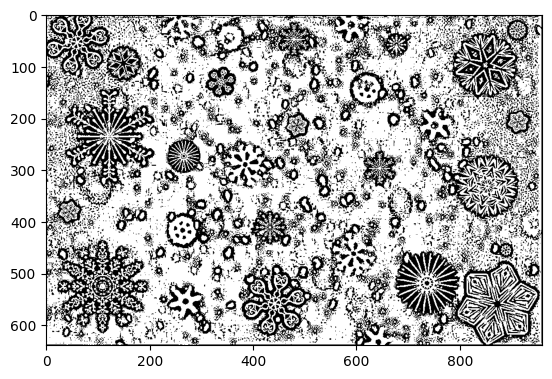

In [ ]:
plt.imshow(adt_g1,'gray')
plt.show()